In [467]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [468]:
from setting import Setting
from protocols import aloha, slotted_aloha, csma, csma_cd

import matplotlib.pyplot as plt

In [469]:
st = Setting(host_num=3, total_time=100, packet_num=4, max_colision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=4)

In [470]:
print('aloha')
a_success, a_idle, a_collision = aloha(st, show_history=True)
print('success_rate: ' + str(a_success))
print('idle_rate: ' + str(a_idle))
print('collision_rate: ' + str(a_collision))

aloha
       V     V  V V     V          V       V           V          V                              V      
h0: ...<---|.......<---|............<---|..<---|............<---|.......<---><---><---|...........<---|.
            V              V     V      V V        V    V              V V V                            
h1: ........<---|...<---|...............<---|<---|.........<---|.<---|................<---|........<---|
        V         V       V  V  V     VV  V V                                          V                
h2: ....<---|.........<---|....<---><---|..<---|.................<---|.................<---|.....<---|..
success_rate: 0.15
idle_rate: 0.25
collision_rate: 0.6


In [471]:
print('slotted_aloha')
sa_success, sa_idle, sa_collision = slotted_aloha(st, show_history=True)
print('success_rate: ' + str(sa_success))
print('idle_rate: ' + str(sa_idle))
print('collision_rate: ' + str(sa_collision))

slotted_aloha
       V     V  V V     V          V       V           V          V                              V      
h0: .....<---|.........................<---|..............................<---|<---|....................
            V              V     V      V V        V    V              V V V                            
h1: ..........<---|.....<---|.....<---><---|.....<---|...............<---><---|<---|<---><---><---><--->
        V         V       V  V  V     VV  V V                                          V                
h2: .....<---|<---|.....<---|....................<---|.........................<---|....................
success_rate: 0.3
idle_rate: 0.35
collision_rate: 0.35


In [472]:
print('csma')
c_success, c_idle, c_collision = csma(st, show_history=True)
print('success_rate: ' + str(c_success))
print('idle_rate: ' + str(c_idle))
print('collision_rate: ' + str(c_collision))

csma
       V     V  V V     V          V       V           V          V                              V      
h0: ...<---|....................................................<---|................<---><---><---><---
            V              V     V      V V        V    V              V V V                            
h1: ....................................................................................................
        V         V       V  V  V     VV  V V                                          V                
h2: ....<---|...<---><---><---><---><---><---><---><---><--->...........................................
success_rate: 0.6
idle_rate: 0.25
collision_rate: 0.15


In [473]:
print('csma_cd')
cd_success, cd_idle, cd_collision = csma_cd(st, show_history=True)
print('success_rate: ' + str(cd_success))
print('idle_rate: ' + str(cd_idle))
print('collision_rate: ' + str(cd_collision))

csma_cd
       V     V  V V     V          V       V           V          V                              V      
h0: ...<--|..............<---><---><---><---><---><---><---><--->.<--->.................................
            V              V     V      V V        V    V              V V V                            
h1: ............<--|........................................................<---><---><---><---><---><--
        V         V       V  V  V     VV  V V                                          V                
h2: ....<|.......<|.....................................................................................
success_rate: 0.7
idle_rate: 0.19
collision_rate: 0.11


#### Q1

In [474]:
host_num_list = [2,3,4,6]
packet_num_list = [1200,800,600,400]

aloha_success = []
slotted_success = []
csma_success = []
csmacd_success = []

for h, p in zip(host_num_list, packet_num_list):
    st = Setting(host_num=h, total_time=12000, packet_num=p, max_colision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=4)
    s, i, c = aloha(st, show_history=False)
    aloha_success.append(s)
    s, i, c = slotted_aloha(st, show_history=False)
    slotted_success.append(s)
    s, i, c = csma(st, show_history=False)
    csma_success.append(s)
    s, i, c = csma_cd(st, show_history=False)
    csmacd_success.append(s)

In [475]:
print(aloha_success)
print(slotted_success)
print(csma_success)
print(csmacd_success)

[0.26708333333333334, 0.18666666666666668, 0.09375, 0.030833333333333334]
[0.5995833333333334, 0.46125, 0.36666666666666664, 0.2725]
[0.9645833333333333, 0.95, 0.9308333333333333, 0.9275]
[0.9654166666666667, 0.9591666666666666, 0.9433333333333334, 0.9145833333333333]


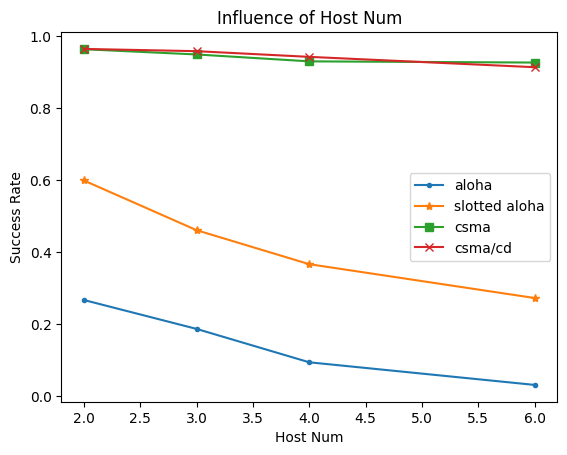

In [476]:
plt.plot(host_num_list, aloha_success, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_success, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_success, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Success Rate")
plt.legend()
plt.show()